In [1]:
from sklearn import svm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def make_meshgrid(x, y, h=0.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contour(xx, yy, Z, **params)

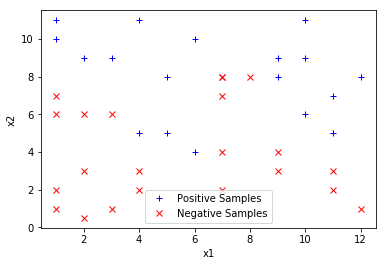

In [7]:
data = pd.read_csv('soft_margin_svm_data.csv', names=['x1', 'x2', 'y'])
train_x = data[['x1','x2']]
train_y = data['y']

data_pos = data[data.y == 1]
data_neg = data[data.y == -1]

plt.plot(data_pos.x1, data_pos.x2, 'b+', label='Positive Samples')
plt.plot(data_neg.x1, data_neg.x2, 'rx', label='Negative Samples')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

In [39]:
# Fitting svm
clf = svm.SVC(kernel='rbf', gamma=0.2, C=0.35)
clf.fit(train_x, train_y)

xx, yy = make_meshgrid(data['x1'], data['x2'])

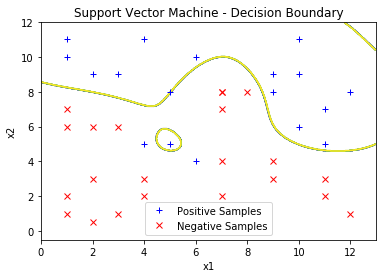

In [40]:
data_pos = data[data.y == 1]
data_neg = data[data.y == -1]

plt.plot(data_pos.x1, data_pos.x2, 'b+', label='Positive Samples')
plt.plot(data_neg.x1, data_neg.x2, 'rx', label='Negative Samples')
plot_contours(plt, clf, xx, yy)

plt.title('Support Vector Machine - Decision Boundary')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()